In [99]:
import qiskit

import numpy as np
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_histogram

1. Escreva uma função (clássica) `inv_media` que recebe um array como entrada e retorna o array invertido sobre a média.


In [2]:
def inv_media(vetor):
    inv_media_vetor = 0
    vetor = np.asarray(vetor)
    inv_media_vetor = (2*np.mean(vetor))-(vetor)
    return inv_media_vetor


2. Escreva uma função `qinv_media` que recebe um número inteiro n como entrada e retorna o circuito quântico que realiza a inversão sobre a média em um estado com n qubits.


In [8]:
qc = qiskit.QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [6]:
def qinv_media(n):
    '''
    :param n: número de qubits
    :return: circuit inversão sobre a média
    '''
    circuito = qiskit.QuantumCircuit(n)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(n):
        circuito.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(n):
        circuito.x(qubit)
    # Do multi-controlled-Z gate
    circuito.h(n-1)
    circuito.mct(list(range(n-1)), n-1)  # multi-controlled-toffoli
    circuito.h(n-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(n):
        circuito.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(n):
        circuito.h(qubit)

    return circuito

3. Qual o custo da inversão sobre a média em um computador clássico? E em um computador quântico?


4. (Oráculo trivial). Escreva uma função que receba o número de qubits n e um valor k e crie um circuito que inverta a fase da amplitude a\[ k ].


In [150]:
from qiskit.circuit.library import Diagonal

def oraculo_trivial(n, k=0):

    diagonal_elements = np.ones(2**n)
    diagonal_elements[k] = diagonal_elements[k]*-1

    oracle_gate = Diagonal(diagonal_elements)
    oracle_gate.name = "Oracle"

    #---Circuito----#

    circuito_oraculo = qiskit.QuantumCircuit(n)
    circuito_oraculo.append(oracle_gate, list(range(n)))

    return circuito_oraculo

In [175]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

n = 4
range_=list(range(n))

grover_circuit = qiskit.QuantumCircuit(n)

grover_circuit = initialize_s(grover_circuit,range_)

grover_circuit.append(oraculo_trivial(n,k=2), range_)
#grover_circuit.append(oracle_ex3, [0,1,2])

grover_circuit.append(qinv_media(n), range_)
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├─────────
        ├───┤│             ││        │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1            ├┤1       ├─░──╫─┤M├──────
        ├───┤│  circuit559 ││  $U_s$ │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├───
        ├───┤│             ││        │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3            ├┤3       ├─░──╫──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

{'0000': 37, '0001': 35, '0010': 464, '0011': 34, '0100': 40, '0101': 36, '0110': 39, '0111': 32, '1000': 41, '1001': 33, '1010': 41, '1011': 38, '1100': 37, '1101': 34, '1110': 47, '1111': 36}


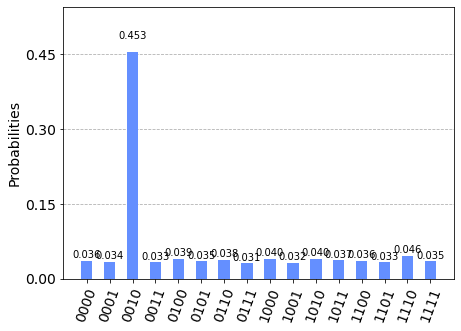

In [176]:
backend = qiskit.Aer.get_backend('qasm_simulator')
results = qiskit.execute(grover_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
print(answer)
plot_histogram(answer)